In [1]:
%pip install -r requirements.txt
%pip install ./crowd-rl

Note: you may need to restart the kernel to use updated packages.
Processing ./crowd-rl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for crowd-rl: filename=crowd_rl-0.0.1-py3-none-any.whl size=14195 sha256=b517f232cbb351c86fa9b639443995c27b364dcf3d4308fdfcd9224547002907
  Stored in directory: /home/kolibri/.cache/pip/wheels/76/75/c3/e0ee9023591d0c63c3f2436587e53ec2bcf47d39af5b80c0b4
Successfully built crowd-rl
  Attempting uninstall: crowd-rl
    Found existing installation: crowd-rl 0.0.1
    Uninstalling crowd-rl-0.0.1:
      Successfully uninstalled crowd-rl-0.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
from copy import deepcopy

import numpy as np
from crowd_rl import crowd_rl_v0 as crowd
from tests.test_configs import mall

frame_agent_data = {}
frame_attendant_data = {}
agent_queues_data = {}

# Mall, Shop, Health
if __name__ == "__main__":
    env = crowd.env(config=mall.env_config, render_mode="rgb_array")
    env.reset(seed=42)

    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()

        if termination or truncation:
            action = None
        else:
            obs = observation

            distances = obs[:4]
            action = np.where(distances == distances.min())[0]
            action = action[random.randint(0, len(action) - 1)]
            action += 1


        frame_agent_data[env.frames] = deepcopy(env.agents_data)
        frame_attendant_data[env.frames] = deepcopy(env.attendants_data)
        agent_queues_data[env.frames] = deepcopy(env.queues_data)


        screenshot = env.step(action)

    env.close()

print(screenshot)

None


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
busy_time_attendant = {}
attendant_attending = []

for num, x in frame_attendant_data.items():
    total_busy = 0
    
    for key, value in x.items():
        if not key in busy_time_attendant:
            busy_time_attendant[key] = {}
            busy_time_attendant[key]["busy"] = 0

        if value.busy:
            busy_time_attendant[key]["busy"] += 1
            total_busy += 1
    attendant_attending.append(total_busy)

agent_heatmap = np.zeros(shape=(mall.env_config.height, mall.env_config.width))
for x in frame_agent_data.values():
    for y in x.values():
        agent_heatmap[y.pos.y][y.pos.x] += 1

# Tempo gasto em atendimento por atendente
# e
# Atendimento ocupado

Text(0.5, 0.98, 'Tempo gasto atendendo')

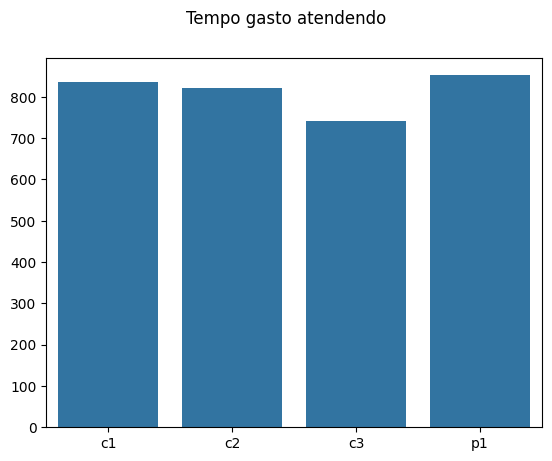

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots()
sns.barplot(x = busy_time_attendant.keys(), y = [x["busy"] for x in busy_time_attendant.values()])
fig.suptitle('Tempo gasto atendendo')

Text(0.5, 0.98, 'Ocupação de atendentes por tempo')

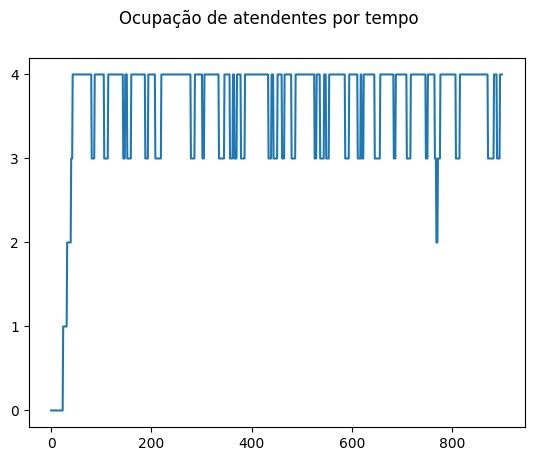

In [26]:
fig, axes = plt.subplots()
g = sns.lineplot(attendant_attending)
g.set_yticks(range(max(attendant_attending) + 1)) 
fig.suptitle('Ocupação de atendentes por tempo')

# Mapa de calor, trafego de agentes

<Axes: >

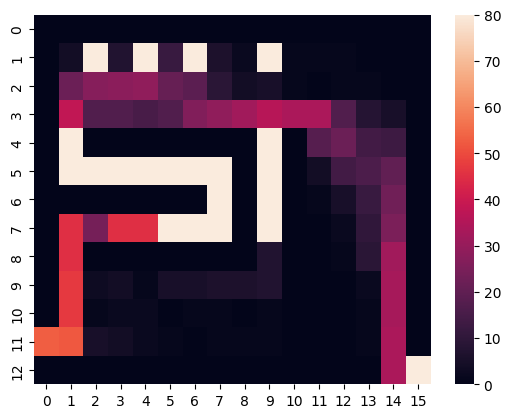

In [29]:
sns.heatmap(agent_heatmap, vmax=80)